In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

In [3]:
df=pd.read_csv("https://storage.googleapis.com/kaggle-datasets/121/280/Pokemon.csv?GoogleAccessId=datasets@kaggle-161607.iam.gserviceaccount.com&Expires=1503592837&Signature=vYI5zUOlos4nQJYZ2BhuKPHLY4zZEoagZW7tUjyQBJGPMFaZfII33cKYrjFG66HGpgljJHYUEBTz29jJAEbLIXGjeVslicichxFnpG9n8tv4aFXeZe9pW0vaZYMKwA1IcPy%2FLlLlCv%2F6wi3GSFpkyJghxXkOO%2BG4xAwBCPF0%2BiRW8H28b9lacicRx7IVePzRP%2FNYrGcMEWc6u%2B0sluDg5lptWFQJ%2B6O5dzfS091d1IaF%2B3kShVtGFg5nr%2FY%2FUeS4KXTBlp%2BbnjXs5saoty6IEW1O6lauJZm4zasFgfUYzuyDdh79ead5gqWmM6LtfMiyEQ2eim4a9qFfK5pv6RM38g%3D%3D")

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


In [10]:
df=df.drop(["Generation","Legendary"],axis=1)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


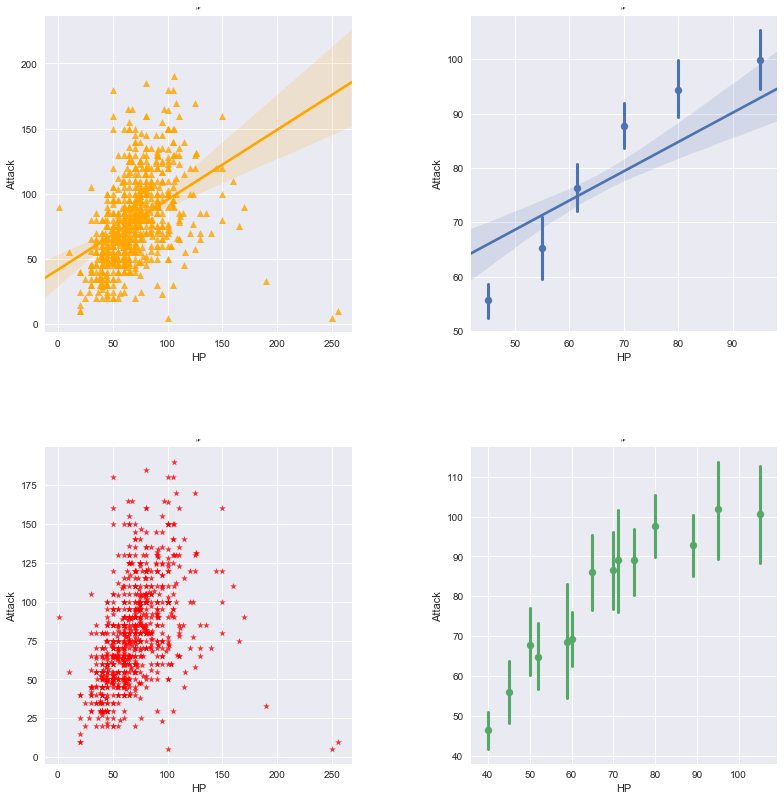

In [59]:
fig,axs=plt.subplots( 2 , 2 ,figsize=(12,12))
ax1=plt.subplot2grid((10,10),(0,0),colspan=4,rowspan=4)
ax2=plt.subplot2grid((10,10),(5,0),colspan=4,rowspan=4)
ax3=plt.subplot2grid((10,10),(0,5),colspan=4,rowspan=4)
ax4=plt.subplot2grid((10,10),(5,5),colspan=4,rowspan=4)
plt.tight_layout()
ax1.set_title("HP",fontsize=4)
ax2.set_title("HP",fontsize=4)
ax3.set_title("HP",fontsize=4)
ax4.set_title("HP",fontsize=4)
sns.regplot(x="HP",y="Attack",data=df,marker="^",ax=ax1,color="orange")
sns.regplot(x="HP",y="Attack",data=df,fit_reg=False,ax=ax2,marker="*",color="red")
sns.regplot(x="HP",y="Attack",data=df,ax=ax3,x_bins=6)
sns.regplot(x="HP",y="Attack",data=df,ax=ax4,ci=99,x_bins=14,fit_reg=False)
plt.show()

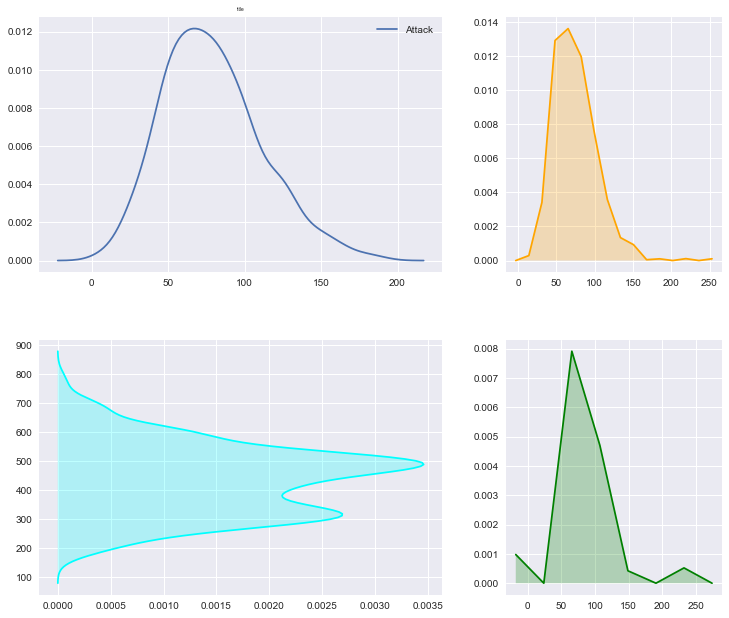

In [8]:
fig,axs=plt.subplots(4,4,figsize=(10,10))
ax1=plt.subplot2grid((12,8),(0,0),rowspan=5,colspan=5)
ax2=plt.subplot2grid((12,8),(0,5),rowspan=5,colspan=5)
ax3=plt.subplot2grid((12,8),(5,0),rowspan=5,colspan=5)
ax4=plt.subplot2grid((12,8),(5,5),rowspan=5,colspan=5)
fig.tight_layout(pad = 0.4, w_pad = 3.0, h_pad = 4.0)
ax1.set_title("title",fontsize=5)
sns.kdeplot(df.Attack,ax=ax1)
sns.kdeplot(df["Sp. Def"], shade = True, color = "orange", gridsize = 10, legend = False, ax=ax2)
sns.kdeplot(df["Total"], shade = True, color = "cyan", gridsize = 100,vertical=True, legend = False, ax=ax3)
sns.kdeplot(df["HP"], shade = True, color = "green", gridsize = 6, legend = False, ax=ax4)
plt.show()

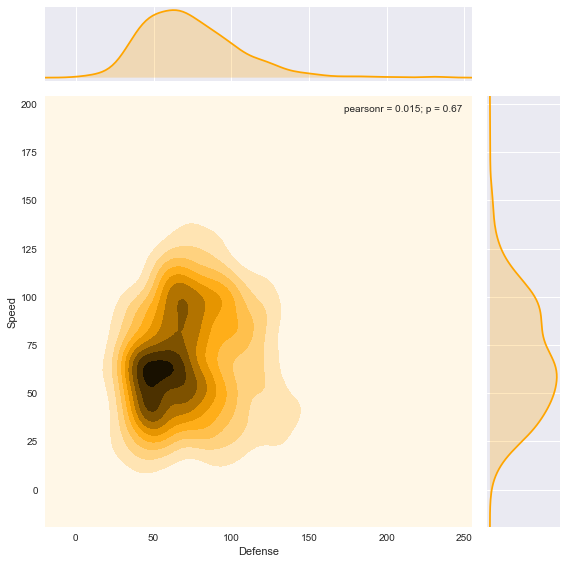

In [5]:
sns.jointplot(x='Defense', y='Speed', 
              data=df, color ='orange', kind ='kde', 
              size = 8.0)
plt.show()

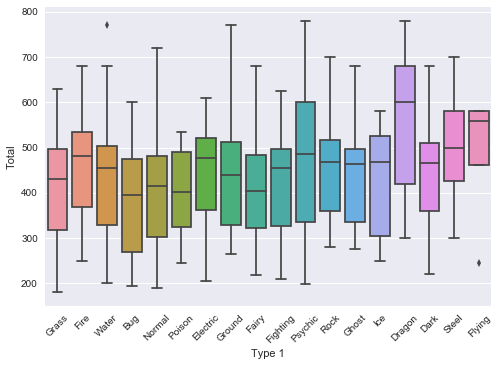

In [11]:
sns.boxplot(x = "Type 1", y = "Total", data = df)
plt.xticks(rotation= 45)
plt.show()